# Getting Familiar with Gymnasium

`Gymnasium` serves as an interface for RL experiments, providing standardized APIs to interact with a variety of environments. `MuJoCo`, on the other hand, provides the physics engine that underpins many of these environments.

* `Gymnasium` is a standardized API for reinforcement learning, offering a broad collection of reference environments. It's designed to be simple and Pythonic, allowing for the representation of general RL problems. Users can create environments, initiate them, execute actions based on a user-defined policy, and manage the environment's state, including resetting it upon termination or truncation of episodes. Here's the documentation you would find useful: [Gymnasium Documentation](https://gymnasium.farama.org).
* `MuJoCo`, which stands for Multi-Joint dynamics with Contact, is a high-performance physics engine for simulating complex dynamic systems with a focus on robotics, biomechanics, and other areas requiring fast and accurate simulations. It is now open-sourced by DeepMind as of 2022, making it freely available. It includes various environments like `Ant`, `HalfCheetah`, `Hopper`, `Humanoid`, etc. You can see more in the [Gymnasium Documentation on MuJoCo](https://gymnasium.farama.org/environments/mujoco/).

In this tutorial, you'll get to know how to interact with `Gymnasium`'s interface with the `MuJoCo` and some other environments. `Gymnasium` is designed to be universal, making it easy to switch between different environments without changing your setup much.

## Installation

Before we dive into the code, we strongly recommend you check out `installation.md` first and follow the installation procedures. If followed correctly, the requirements listed below would have been already installed.

In [1]:
!pip install "gymnasium[mujoco,classic_control]"
!pip install mediapy
!pip install torch
!pip install tensorboard
!pip install tensorboardX
!pip install 'moviepy<2.0'

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110744 sha256=48ac9a5899b2669a0cfa2ae9b38bd3219a24a91251b2cba79dcf8626ea9f494a
  Stored in directory: /Users/ingu/Library/Caches/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Attempting uninstall: mo

In [5]:
import os

os.environ["MUJOCO_GL"] = "glfw"

In [6]:
import gymnasium as gym
import mediapy as media
import matplotlib.pyplot as plt

## Creating a Gymnasium Environment

Gymnasium (Gym) is our gateway to various reinforcement learning environments, including MuJoCo.

You can easily create a gym environment with `gym.make`. Here's how you can do this with `Ant-v4` environment from `MuJoCo`.

Also, in the following code you may notice the usage of `env.reset` and `env.render`:
- `env.reset()`: This method resets the environment to its initial state, and returns the observation and additional information of the environment.
- `env.render()`: This method renders the current state as an image.

Initialized environment: Ant-v4


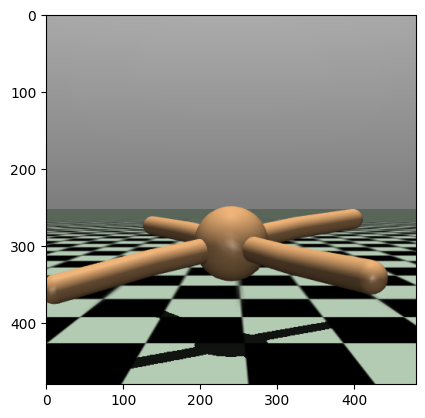

In [25]:
# Initialize the Ant environment
env_name = "Ant-v4"
env = gym.make(env_name, render_mode="rgb_array", terminate_when_unhealthy=False)
print(f"Initialized environment: {env_name}")

initial_obs, info = env.reset()
rendered_state = env.render()
plt.imshow(rendered_state)

 The `Ant-v4` environment simulates a quadruped robot in a 2D space. The ant is a 3D robot consisting of one torso (free rotational body) with four legs attached to it with each leg having two links. The goal is to coordinate the four legs to move in the forward (right) direction by applying torques on the eight hinges connecting the two links of each leg and the torso (nine parts and eight hinges).

The environment defines an attribute called the `observation_space` and `action_space`.
You can see how it looks like below.
The observation space of `Ant-v4` has 27 distinct elements, and the action space has 8 dimensions.
If you want to figure out what each dimension of the observations and the actions means, it would be helpful to see the documents of the environment.
[Ant Documentation](https://www.gymlibrary.dev/environments/mujoco/ant/)

In [8]:
obs_space = env.observation_space
action_space = env.action_space
print(f"The observation space: {obs_space}")
print(f"The action space: {action_space}")

The observation space: Box(-inf, inf, (27,), float64)
The action space: Box(-1.0, 1.0, (8,), float32)


As we previously discussed, we can create many other environments with `gym.make`, with the general interface provided with `gym`.

Here's some other examples, which is not actually from `MuJoCo`, but great for illustrating different observation and action spaces are possible:

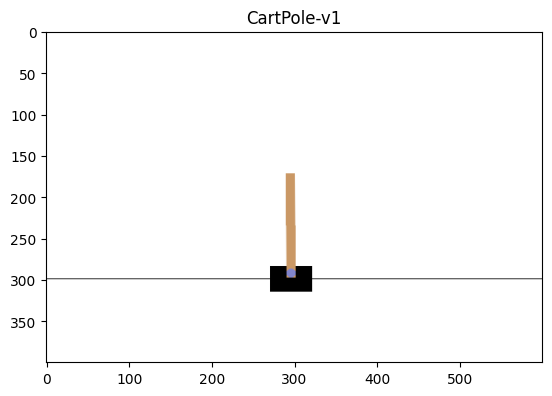

The observation space of CartPole-v1: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
The action space of CartPole-v1: Discrete(2)


<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [9]:
def create_and_visualize_gym_env(env_name):
    env = gym.make(env_name, render_mode="rgb_array")
    env.reset()
    rendered_image = env.render()
    plt.title(env_name)
    plt.imshow(rendered_image)
    plt.show()

    print(f"The observation space of {env_name}: {env.observation_space}")
    print(f"The action space of {env_name}: {env.action_space}")
    return env


create_and_visualize_gym_env("CartPole-v1")

`CartPole-v1` has discrete action space, where the agent can choose to push the cart to the left or to the right.
The goal of the agent is to keep the pole balanced on the cart for as long as possible.

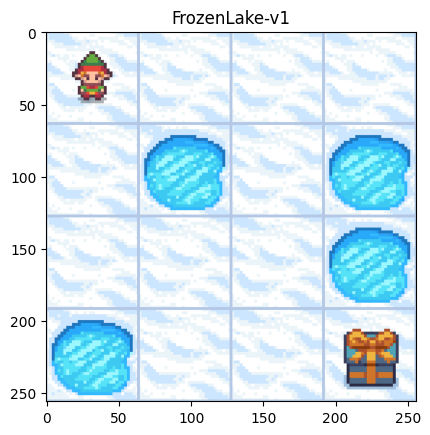

The observation space of FrozenLake-v1: Discrete(16)
The action space of FrozenLake-v1: Discrete(4)


<TimeLimit<OrderEnforcing<PassiveEnvChecker<FrozenLakeEnv<FrozenLake-v1>>>>>

In [10]:
create_and_visualize_gym_env("FrozenLake-v1")

`FrozenLake-v1` environment has a 4x4 grid as an observation space, where each value represents different tiles in the grid.
In this environment, the agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

You can see that `FrozenLake-v1` has discrete observation space as well as discrete action space.

## Interacting with the Environment

To interact with the environment, you can use the methods of the `Env` class. Here's the two important functions.
- `reset`: This function resets the environment to its initial state, and returns the observation of the environment corresponding to the initial state.
- `step` : This function takes an action as an input and applies it to the environment, which leads to the environment transitioning to a new state. The reset function returns five things:

1. `observation`: The observation of the state of the environment.
2. `reward`: The reward that you can get from the environment after executing the action that was given as the input to the step function.
3. `terminated`: A boolean indicating whether the episode has ended due to reaching a terminal state.
4. `truncated`: A boolean indicating whether the episode was cut off due to an artificial time limit or other constraints.
5. `info`: This provides additional information depending on the environment, such as number of lives left, or general information that may be conducive in debugging.


Let's test with a simple code that takes a single step of the environment with a random action. Note here that you can sample a random action from the action space using `env.action_space.sample()`.

In [26]:
# Create the environment
env = gym.make("Ant-v4", render_mode="rgb_array", terminate_when_unhealthy=False)

# Reset the environment and print the initial observation
obs, info = env.reset()
print("The initial observation is {}".format(obs))

# Sample a random action from the entire action space
random_action = env.action_space.sample()

# Take the action and get the new observation space
new_obs, reward, terminated, truncated, info = env.step(random_action)
print("The new observation is {}".format(new_obs))
print("The reward is {}".format(reward))
print("Is the environment terminated?: {}".format(terminated))
print("Is the environment truncated?: {}".format(truncated))
print("Additional informations: {}".format(info))

The initial observation is [ 7.75932562e-01  9.91012283e-01 -3.01848813e-02 -4.48336241e-02
  4.45660617e-02  3.26646407e-02  7.47929849e-02 -6.27575674e-02
 -8.39143839e-04 -9.16060846e-02  6.39826177e-02  8.47202183e-02
 -7.02155127e-02  4.08879394e-02 -1.36711278e-01 -1.61124809e-01
 -1.16578677e-01 -4.26546916e-02  6.41402544e-02 -2.07395509e-02
 -1.32718592e-01 -7.25350841e-02 -1.29669893e-01  5.32732635e-02
  1.13894378e-01 -7.97806360e-02 -3.11209052e-02]
The new observation is [  0.79111548   0.99683654  -0.03879569  -0.04648805   0.05148467
   0.04974873   0.50380338  -0.14538024  -0.38333845   0.04252926
  -0.4442143   -0.06038721   0.38929855  -0.11361029   0.13830784
   0.08459236  -0.30096088  -0.24896664   0.50637291   0.70240926
  12.086477    -3.21064346  -6.37963638   5.27463781 -12.56938971
  -5.68351313   9.21106851]
The reward is -0.5382395819997263
Is the environment terminated?: False
Is the environment truncated?: False
Additional informations: {'reward_forward':

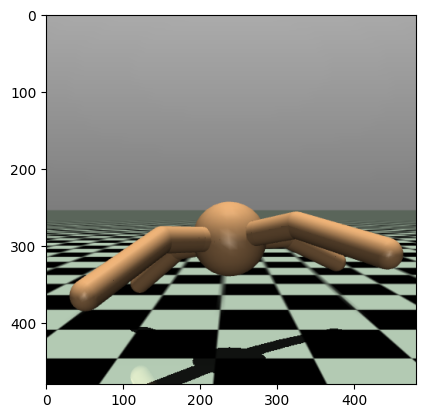

In [13]:
rendered_image = env.render()
plt.imshow(rendered_image)

Now that you figured out how to take an environment step, let's collect and visualize trajectories from the environment with random policy.

In reinforcement learning, an `episode` represents a sequence of steps taken by an agent from the initial state to a terminal state.
We will now simulate the environment's behavior under a random policy, capturing each step as a frame. The run_episode function executes `frames_per_episodes` steps and return the observations (states).

In [14]:
# Define parameters for our simulation
frames_per_episode = 300  # Number of steps (frames) per episode

In [29]:
# Function to simulate an episode with a random policy
def run_episode(env, frames_per_episode):
    frames = []  # Collect frames for video rendering
    env.reset()
    for _ in range(frames_per_episode):
        frames.append(env.render())
        action = env.action_space.sample()  # Random action
        new_obs, reward, truncated, terminated, info = env.step(action)
        if truncated or terminated:
            break
    return frames


# Visualize one episode with a random policy
frames = run_episode(env, frames_per_episode)

media.show_video(frames, fps=30)

You can also reset the environment using `env.reset()`. Note that the return value of the reset function is the initial state.

initial observation: (array([ 0.77241218,  0.93694017, -0.03985122, -0.03803915, -0.01654857,
       -0.0127934 ,  0.08812965,  0.08517369,  0.01743019,  0.04065462,
       -0.06848342, -0.01624334,  0.04516952,  0.10140087, -0.07062015,
       -0.11535222, -0.06012893,  0.06983962,  0.09738451, -0.04082433,
       -0.13579999,  0.01420166,  0.05931658,  0.05258724,  0.02952848,
       -0.02135776,  0.12208343]), {})



""

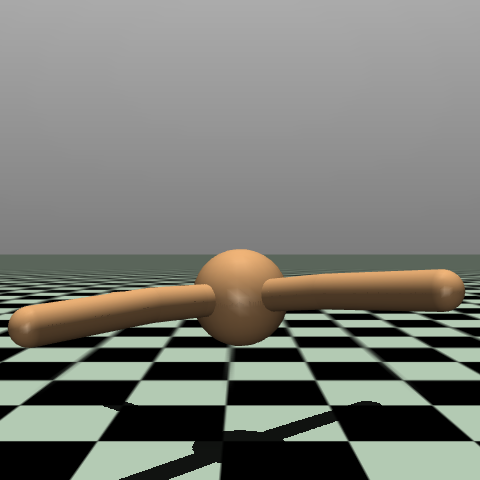

: 

In [ ]:
ob = env.reset()
print("initial observation: {}\n".format(ob))
rendered_image = env.render()
media.show_image(rendered_image)

Now let's visualize random trajectories with other environments that we discussed before.

In [18]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
ob, info = env.reset()

# Visualize 10 episodes with a random policy
whole_frames = []
for _ in range(10):
    frames = run_episode(env, frames_per_episode=100)
    whole_frames.extend(frames)

media.show_video(whole_frames, fps=30)

In [19]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
ob, info = env.reset()

# Visualize 10 episodes with a random policy
whole_frames = []
for _ in range(10):
    frames = run_episode(env, frames_per_episode=100)
    whole_frames.extend(frames)

media.show_video(whole_frames, fps=10)

## Conclusion

Now you learned how to create and visualize a gym environment, and how to simulate an episode with a random policy! Feel free to try some other environments that you can find from [gymnasium documentation](https://gymnasium.farama.org/).